In [243]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import csv
import os
import numpy as np

In [244]:
# path to the client-hello-cipher-suites.csv file
# file_path = '../../../results/attributes/DNS/NEW_dns_transID_response_attributes.csv'
file_path = '../../../results/attributes/NTP/NEW_ntp_transmit_response_attributes.csv'

# path to the directory to save the plots
final_output_dir = '../../../results/attributes/NTP/transmitTS_plots'

In [245]:
# df = pd.read_csv(file_path, sep='|')
# df.head()

In [246]:
import csv
csv.field_size_limit(10 * 1024 * 1024)

# Read the CSV file and extract data
device_transID = {}
with open(file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for i, row in enumerate(csvreader):
        # print(row)
        if i == 0:
            continue
        device = row[0].split('|')[0]
        # print(f'device: {device}')
        transIDs = row[0].split('|')[1].split('__')[1:]

        device_transID[device] = transIDs
        # print(f'devicess: {devices}')
            
        #     print(row[0])
        #     qnumber_dicts = row
            # continue

# device_transID['AwairAirQuality'] = ['0000']
# device_transID['LiFXBulb'] = ['0000']

for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

# # Create a dictionary to store qnumbers for each device
# device_qnumbers = {}
# for i, device_list in enumerate(devices):
#     for j, device in enumerate(device_list):
#         qnumber_dict = qnumber_dicts[i][j]
#         transaction_id = qnumber_dict['transaction id']
#         qnumbers = list(qnumber_dict.keys())
#         qnumbers.remove('transaction id')
        
#         if device not in device_qnumbers:
#             device_qnumbers[device] = []
#         device_qnumbers[device].extend(qnumbers)

# # Print the resulting dictionary
# for device, qnumbers in device_qnumbers.items():
#     print(f"Device: {device}, Qnumbers: {qnumbers}")


key: AwairAirQuality, value: ['dbd5ba43cb47498b', 'dbd87966f60202a1', 'dbe71a89dd7aea5f', 'dbcf7c19cfa7de79', 'dbdbe6ebe088559b', 'dbec5996f0d3abcb', 'dbd5c858f10cf765', 'dbe309e4efff558e', 'dbdb05eadfb1272c', 'dbdcabccc6fea715', 'dbcfb358ecb04ab6', 'dc6222912514133c', 'dbe4e80740ed6912', 'dbeac1c4f9986ce4', 'dbe1b863858e0e2a', 'dbe1feb3c80a2319', 'dbd2deff80dc9cd7', 'dbcf51e9a3818d8b', 'dbe6fe69bd457248', 'dbd67f2497883141', 'dbcfeb9e9d5b9c8d', 'dbcfc16e71190f69', 'dbe009e989bafe09', 'dbdaa37f6dd4d179', 'dbe44d56885be711', 'dbe0f38291261e3e', 'dbe590c80736c490', 'dbdd548d99562b9c', 'dbd2566190dcd000', 'dbd023dee1884deb', 'dbdb5a4b378d6d9d', 'dbe8c06bd8f69232', 'dbee61e9789caed0', 'dbcfdd938e822a5a', 'dbdabf9a962081b4', 'dbde9c47b34c2986', 'dbcff9aec4642939', 'dbe582b803dad631', 'dbcf19a3fb5c34b7', 'dc62a121c7f1b1dc', 'dbdf7d48e18dc099', 'dbe253143f48ca70', 'dbdb4c3b21a45436', 'dbdc111c0d1c97f3', 'dbed64c82fa29b35', 'dbdd1c4d5ae58d7b', 'dbd53bb337e8202d', 'dbe07a6a006c3878', 'dbcf8a2ef

## Data Pre-Processing

In [247]:
def hex_to_decimal(hex_number):
    try:
        decimal_number = int(hex_number, 16)
        return decimal_number
    except ValueError:
        raise ValueError("Invalid hexadecimal number")

In [248]:
import struct
from datetime import datetime, timedelta

def hex_to_ntp_timestamp(hex_timestamp):
    # Convert the hexadecimal string to a 64-bit integer
    ntp_int = int(hex_timestamp, 16)
    
    # Calculate seconds and fractional seconds
    seconds = ntp_int >> 32
    fractional = ntp_int & 0xFFFFFFFF
    
    # Convert to datetime
    ntp_epoch = datetime(1900, 1, 1)
    ntp_time = ntp_epoch + timedelta(seconds=seconds, microseconds=(fractional * 1e6 / 0xFFFFFFFF))
    
    return ntp_time




In [249]:
for device, transID_list in device_transID.items():
    print(f'device: {device}')
    newList = []
    for i, transID in enumerate(transID_list):
        if transID == 'None' or transID == 'nan': continue
        print(f'i: {i}, transID: {transID}')
        # for ci, c in enumerate(cs):
        dec_val = hex_to_ntp_timestamp(transID)
        # print(f'hex_val: {dec_val}')
        # cs[ci] = hex_val
        # transID_list[i] = math.log2(dec_val)
        # transID_list[i] = dec_val
        print(type(dec_val))
            
        # newList.append(new_val)  
        newList.append(dec_val)  
    
    device_transID[device] = sorted(newList)


# # Example hex transmit timestamp
# hex_timestamp = "dbd5ba43cb47498b"  # Replace with your hex value

# ntp_time = hex_to_ntp_timestamp(hex_timestamp)
# print("NTP Time:", ntp_time)

device: AwairAirQuality
i: 0, transID: dbd5ba43cb47498b
<class 'datetime.datetime'>
i: 1, transID: dbd87966f60202a1
<class 'datetime.datetime'>
i: 2, transID: dbe71a89dd7aea5f
<class 'datetime.datetime'>
i: 3, transID: dbcf7c19cfa7de79
<class 'datetime.datetime'>
i: 4, transID: dbdbe6ebe088559b
<class 'datetime.datetime'>
i: 5, transID: dbec5996f0d3abcb
<class 'datetime.datetime'>
i: 6, transID: dbd5c858f10cf765
<class 'datetime.datetime'>
i: 7, transID: dbe309e4efff558e
<class 'datetime.datetime'>
i: 8, transID: dbdb05eadfb1272c
<class 'datetime.datetime'>
i: 9, transID: dbdcabccc6fea715
<class 'datetime.datetime'>
i: 10, transID: dbcfb358ecb04ab6
<class 'datetime.datetime'>
i: 11, transID: dc6222912514133c
<class 'datetime.datetime'>
i: 12, transID: dbe4e80740ed6912
<class 'datetime.datetime'>
i: 13, transID: dbeac1c4f9986ce4
<class 'datetime.datetime'>
i: 14, transID: dbe1b863858e0e2a
<class 'datetime.datetime'>
i: 15, transID: dbe1feb3c80a2319
<class 'datetime.datetime'>
i: 16, tra

In [250]:
for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

key: AwairAirQuality, value: [datetime.datetime(2016, 11, 10, 11, 28, 41, 392489), datetime.datetime(2016, 11, 10, 12, 28, 47, 806868), datetime.datetime(2016, 11, 10, 13, 28, 47, 876907), datetime.datetime(2016, 11, 10, 14, 28, 47, 930271), datetime.datetime(2016, 11, 10, 15, 28, 48, 145926), datetime.datetime(2016, 11, 10, 16, 6, 59, 981876), datetime.datetime(2016, 11, 10, 17, 7, 5, 445589), datetime.datetime(2016, 11, 10, 18, 7, 5, 488981), datetime.datetime(2016, 11, 10, 19, 7, 5, 572705), datetime.datetime(2016, 11, 10, 20, 7, 5, 638696), datetime.datetime(2016, 11, 10, 21, 7, 5, 771550), datetime.datetime(2016, 11, 10, 22, 7, 5, 757119), datetime.datetime(2016, 11, 10, 23, 7, 5, 811155), datetime.datetime(2016, 11, 11, 0, 7, 10, 996952), datetime.datetime(2016, 11, 11, 1, 7, 5, 954972), datetime.datetime(2016, 11, 11, 2, 7, 6, 360161), datetime.datetime(2016, 11, 11, 3, 2, 48, 924565), datetime.datetime(2016, 11, 11, 4, 2, 54, 441789), datetime.datetime(2016, 11, 11, 5, 2, 54, 6

## Plotting

In [251]:
def plot_list_as_line_plt(lst2D, save_name):
    x_values = 0
    # for i, cs in enumerate(lst2D):
    # if len(cs) <= 1:
        # print(f'case')
        # continue
        # return
    x_values = list(range(len(lst2D)))  # Use list indices as x-axis
    x_values = [x + 1 for x in x_values]
    y_values = lst2D  # Use list items as y-axis
    
    # general config for plots with more than 1 graph
    # if i==0:
    #     linstl = '-'
    #     mkr = 'o'
    #     clr = 'b'
    # if i==1:
    #     linstl = ':'
    #     mkr = '*'
    #     clr = 'y'
        
    # # specific configs for required devices
    # if save_name == 'LiFXBulb':  # LiFXBulb
    #     linstl = '--'
    #     mkr = '^'
    #     clr = 'c'
    # elif save_name == 'TPLinkCamera':  # TPLinkCamera
    #     linstl = '-.'
    #     mkr = 'x'
    #     clr = 'r'

    linstl = '-'
    mkr = '.'
    clr = 'b'
    ssiizzee = 2
    if save_name == 'RingDoorBell' or save_name == 'TPLinkCamera' or save_name == 'TribySpeaker':
        ssiizzee = 20
    # plt.plot(x_values, y_values, marker=mkr, linestyle=linstl, color=clr)
    plt.scatter(x_values, y_values, color=clr, marker=mkr, label='Data Points', s=ssiizzee)

    plt.xlabel('Order')
    plt.ylabel('Transmit timestamp')
    # plt.title('Line Plot from List')
    plt.grid(True)

    x_values = np.array(x_values)
    even_xticks = x_values[x_values % 50 == 0]  # to get the x-axis grid lines
    # plt.xticks(even_xticks)
    
    # if len(x_values) <= 25:
    #     plt.xticks(range(len(x_values)), [int(x) for x in x_values])
    # elif len(x_values) <= 50:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 2 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 75:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 3 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 100:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 5 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)

    plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
    plt.show()

# def plot_list_as_line_sns(lst2D, save_name):
#     x_values = list(range(len(lst)))  # Use list indices as x-axis
#     y_values = lst  # Use list items as y-axis

#     sns.lineplot(x=x_values, y=y_values, marker='o', color='b')
#     plt.xlabel('Index')
#     plt.ylabel('Value')
#     plt.title('Line Plot from List')
#     plt.grid(True)

#     plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
#     plt.show()


device_name: AwairAirQuality


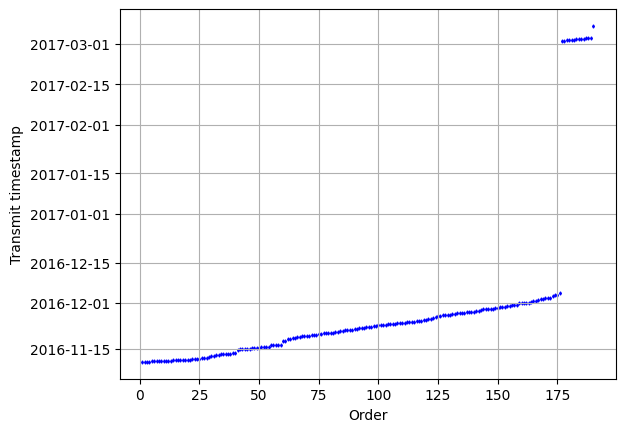

device_name: LiFXBulb


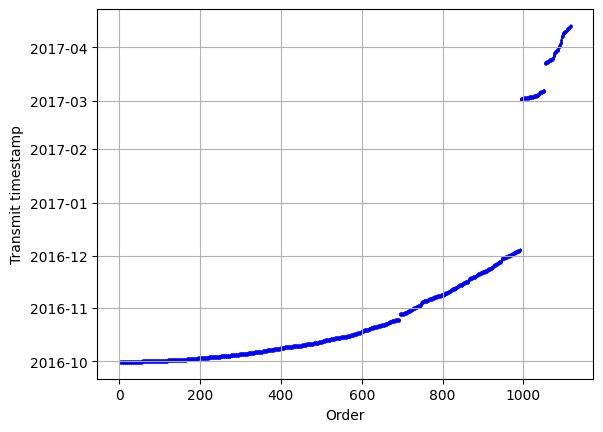

device_name: PixStarPhotoFrame


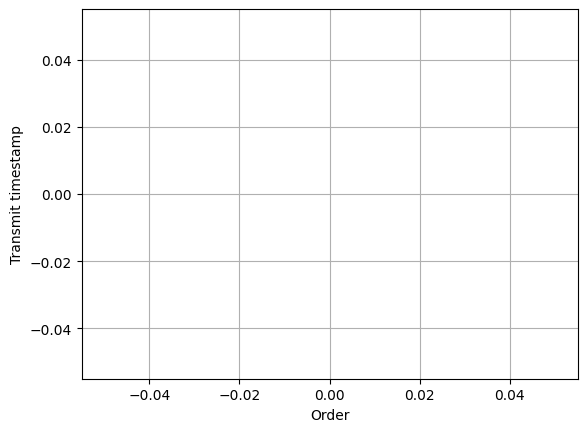

device_name: RingDoorBell


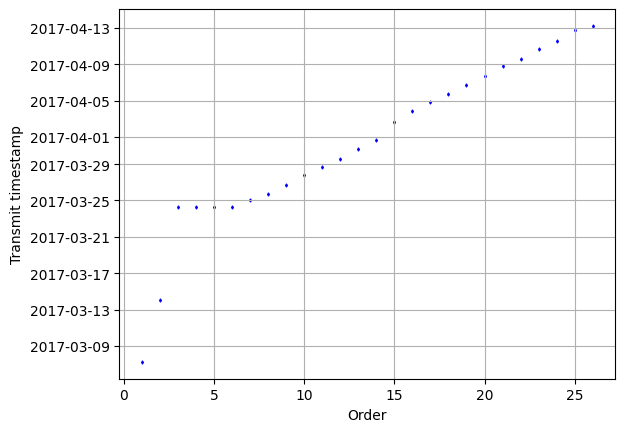

device_name: TPLinkCamera


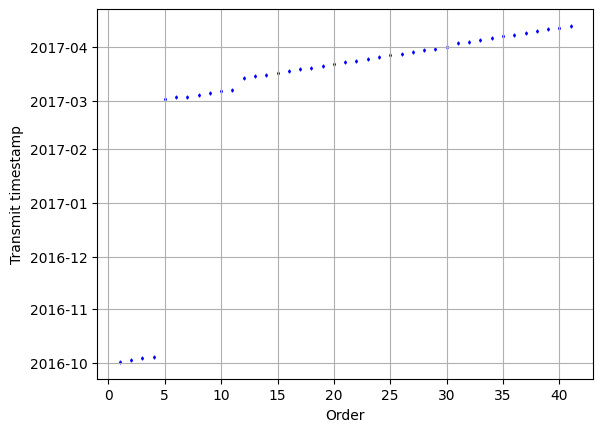

device_name: TribySpeaker


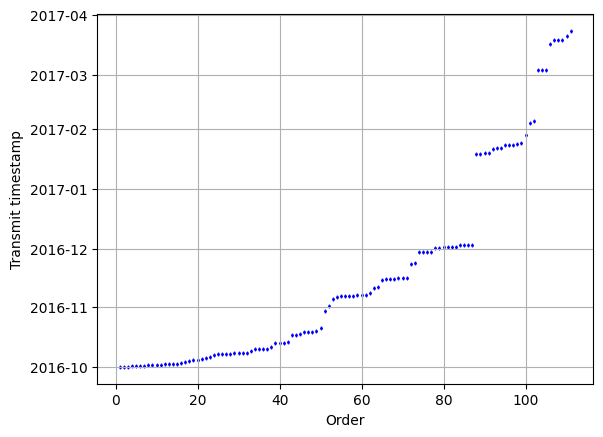

device_name: AmazonEcho


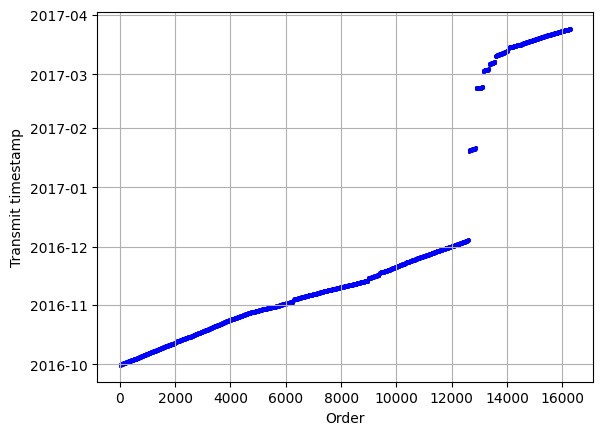

device_name: WithingsSleepSensor


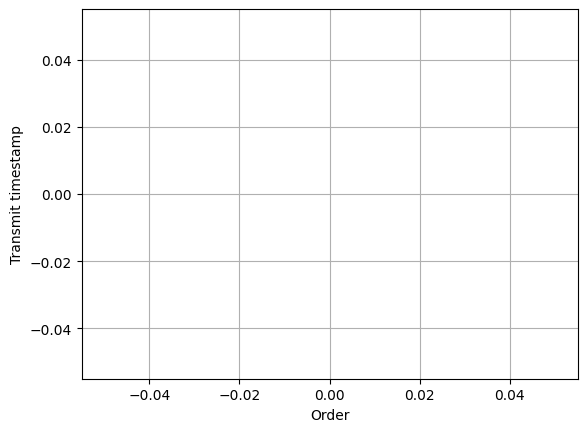

device_name: SamsungCamera


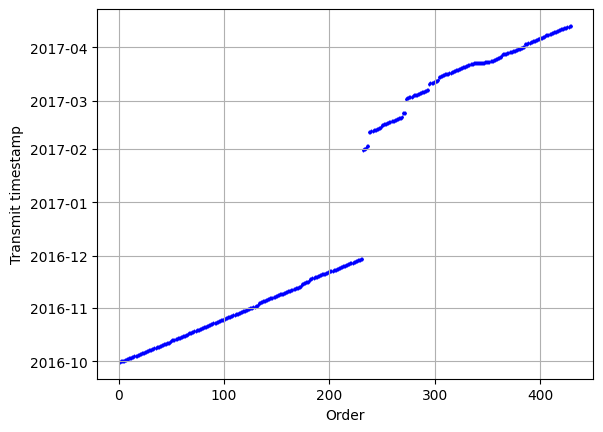

device_name: WithingsBabyMonitor


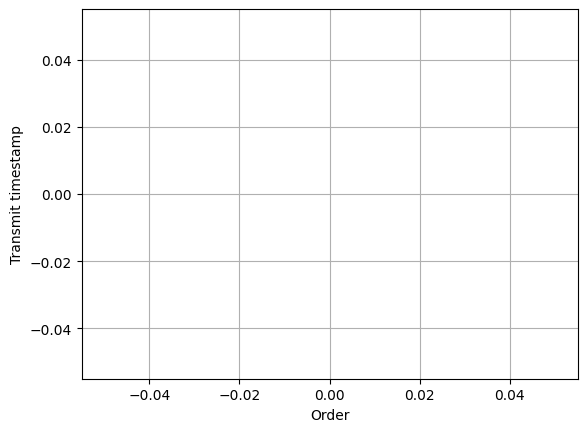

In [252]:
# plot_list_as_line_plt(dict01['AwairAirQuality'][0])
# plot_list_as_line_sns(dict01['AwairAirQuality'][0])
printed_devices = []
for device, css in device_transID.items():
    device_name = device
    # if '/' in device:
    #     device_name = device.split('/')[0]

    # if device_name in printed_devices:
    #     continue  
    print(f'device_name: {device_name}')
    plot_list_as_line_plt(css, device_name)
    printed_devices.append(device_name)
    # if len(css) < 1:
    #     print(f'device: {device} has 0 ciphersuites')
    #     continue
    # for csi, cs in enumerate(css):
    #     if len(cs) <= 1:
    #         print(f'device: {device}, cs: {csi} has 0 ciphers')
    #         continue
    #     if device_name in printed_devices:
    #         continue
    #     plot_list_as_line_plt(cs, device_name)
    #     printed_devices.append(device_name)